In [236]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [237]:
# Load the image
image_path = 'output128.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

In [238]:
# Apply a Gaussian blur to smooth out the image
blurred = cv2.GaussianBlur(image, (15, 15), 0)

In [239]:
# Apply a binary threshold to the image
_, thresholded = cv2.threshold(blurred, 50, 255, cv2.THRESH_BINARY)

In [240]:
# Apply morphological operations to clean up the image
kernel = np.ones((5,5), np.uint8)
opening = cv2.morphologyEx(thresholded, cv2.MORPH_OPEN, kernel, iterations=2)

In [241]:
# Perform distance transform
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.5 * dist_transform.max(), 255, 0)

In [242]:
# Identify sure background
sure_bg = cv2.dilate(opening, kernel, iterations=3)

In [243]:
# Subtract sure foreground from sure background
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

In [244]:
# Label markers for the watershed algorithm
_, markers = cv2.connectedComponents(sure_fg)

In [245]:
# Add one to all markers so that sure background is not zero
markers = markers + 1

In [246]:
# Mark the unknown regions with zero
markers[unknown == 255] = 0

In [247]:
# Convert image to color for watershed processing
image_color = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

In [248]:
# Apply the watershed algorithm
markers = cv2.watershed(image_color, markers)


In [249]:
# Boundaries marked by the watershed algorithm are set to -1
image_color[markers == -1] = [255, 0, 0]  # Mark boundaries in red

In [250]:
# Find contours of the separated regions
contours, _ = cv2.findContours(sure_fg, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [251]:
# Filter out small contours to avoid noise
min_contour_area = 500  # Adjust this value as necessary
human_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_contour_area]

In [252]:
# Draw the contours on the original image
cv2.drawContours(image_color, human_contours, -1, (0, 255, 0), 2)

array([[[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [239, 239, 239],
        [248, 248, 248],
        [255,   0,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [196, 196, 196],
        ...,
        [233, 233, 233],
        [250, 250, 250],
        [255,   0,   0]],

       ...,

       [[  0, 255,   0],
        [  0, 255,   0],
        [182, 182, 182],
        ...,
        [199, 199, 199],
        [212, 212, 212],
        [255,   0,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [201, 201, 201],
        [216, 216, 216],
        [255,   0,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]]

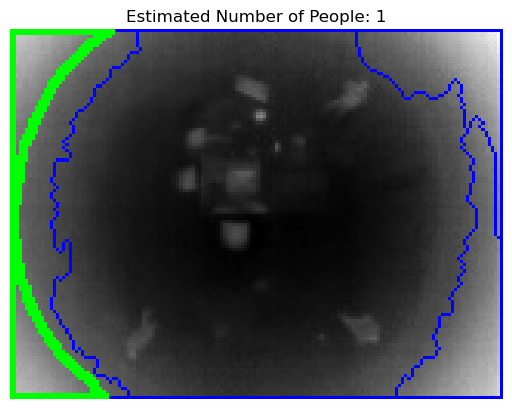

In [253]:
# Display the final output
plt.imshow(cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB))
plt.title(f'Estimated Number of People: {len(human_contours)}')
plt.axis('off')
plt.show()

In [254]:
# Print the estimated number of people
print(f"Estimated Number of People: {len(human_contours)}")

Estimated Number of People: 1
